---
execute: 
    echo: false
    enabled: true
---

In [1]:
import json 
import glob
import torch
import pandas as pd
from IPython.display import display,Markdown

from shapesynthesis.plotting import plot_recon_2d, plot_recon_3d

In [2]:
def model_to_cate(model):
    name = model.split("_")[-1]
    return name.title()


def model_to_modelname(model):
    name_list = model.split("_")[:-1]
    name = " ".join(name_list)
    return name.title()

# Reconstruction of MNIST and ShapeNetCore

The encoder is the `encoder_sparse` and the rendered model is the point cloud
optimization rendering (a non-parametric method). The latter clearly outperforms 
all models.  

In [3]:

fn = glob.glob("./results/**/**.json")
results = []
for filename in fn:
    with open(filename,"r") as f:
        results.extend(json.load(f))

df = pd.DataFrame(results)
df = df.drop(["fscore","normalized"],axis=1)
df["MMD-CD"] *= 1e4 
df["MMD-EMD"] *= 1e3 

df["dataset"] = df["model"].apply(model_to_cate)
df["model"] = df["model"].apply(model_to_modelname)
df = df.groupby(by=["model","dataset"]).agg(["mean"])

df = df.unstack().swaplevel(1,2,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)

display(df)


dataset               Airplane                                           \
                   1-NN-CD-acc 1-NN-CD-acc_f 1-NN-CD-acc_t 1-NN-EMD-acc   
                          mean          mean          mean         mean   
model                                                                     
Ect-128                    NaN           NaN           NaN          NaN   
Ect-256                    NaN           NaN           NaN          NaN   
Ect-64                     NaN           NaN           NaN          NaN   
Encoder                    NaN           NaN           NaN          NaN   
Encoder Chamfer            NaN           NaN           NaN          NaN   
Encoder Downsample         NaN           NaN           NaN          NaN   
Encoder Ect                NaN           NaN           NaN          NaN   
Vae                        NaN           NaN           NaN          NaN   

dataset                                                               \
                   1-NN-EMD-acc_f 1-NN-EMD-acc_t    MMD-CD   MMD-EMD   
                             mean           mean      mean      mean   
model                                                                  
Ect-128                       NaN            NaN  3.382390  0.466779   
Ect-256                       NaN            NaN  0.316157  0.116938   
Ect-64                        NaN            NaN  6.810036  0.965796   
Encoder                       NaN            NaN  1.012534  1.499121   
Encoder Chamfer               NaN            NaN  1.001583  8.894593   
Encoder Downsample            NaN            NaN  1.160574  2.642533   
Encoder Ect                   NaN            NaN  2.413157  1.088348   
Vae                           NaN            NaN       NaN       NaN   

dataset                                      ...          Mnist  \
                   lgan_cov-CD lgan_cov-EMD  ... 1-NN-EMD-acc_f   
                          mean         mean  ...           mean   
model                                        ...                  
Ect-128                    NaN          NaN  ...            NaN   
Ect-256                    NaN          NaN  ...            NaN   
Ect-64                     NaN          NaN  ...            NaN   
Encoder                    NaN          NaN  ...            NaN   
Encoder Chamfer            NaN          NaN  ...            NaN   
Encoder Downsample         NaN          NaN  ...            NaN   
Encoder Ect                NaN          NaN  ...            NaN   
Vae                        NaN          NaN  ...            1.0   

dataset                                                                \
                   1-NN-EMD-acc_t      MMD-CD     MMD-EMD lgan_cov-CD   
                             mean        mean        mean        mean   
model                                                                   
Ect-128                       NaN         NaN         NaN         NaN   
Ect-256                       NaN         NaN         NaN         NaN   
Ect-64                        NaN         NaN         NaN         NaN   
Encoder                       NaN   43.263799   13.009256         NaN   
Encoder Chamfer               NaN         NaN         NaN         NaN   
Encoder Downsample            NaN  159.988590  221.338034         NaN   
Encoder Ect                   NaN         NaN         NaN         NaN   
Vae                      0.973958   43.355855   12.927259    0.026042   

dataset                                                                   \
                   lgan_cov-EMD lgan_mmd-CD lgan_mmd-EMD lgan_mmd_smp-CD   
                           mean        mean         mean            mean   
model                                                                      
Ect-128                     NaN         NaN          NaN             NaN   
Ect-256                     NaN         NaN          NaN             NaN   
Ect-64                      NaN         NaN          NaN             NaN   
Encoder             

# Model outputs

In [4]:
def visualize_2d_model(model,num_pc=5):
    recon_pcs = torch.load(f'./results/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)

def visualize_2d_genmodel(model,num_pc=5):
    recon_pcs = torch.load(f'./results/{model}/samples.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)


def visualize_3d_model(model,scale=1.0,num_pc:int=5):
    recon_pcs = scale*torch.load(f'./results/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)

def visualize_3d_genmodel(model,scale=1.0,num_pc:int=5):
    recon_pcs = scale*torch.load(f'./results/{model}/samples.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)


def visualize_2d_rendered(folder,ectsize,num_pc=5):
    recon_pcs = torch.load(f'./results/{folder}/reconstructions_{ectsize}.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{folder}/references_{ectsize}.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)

# Generated Samples

## MNIST 


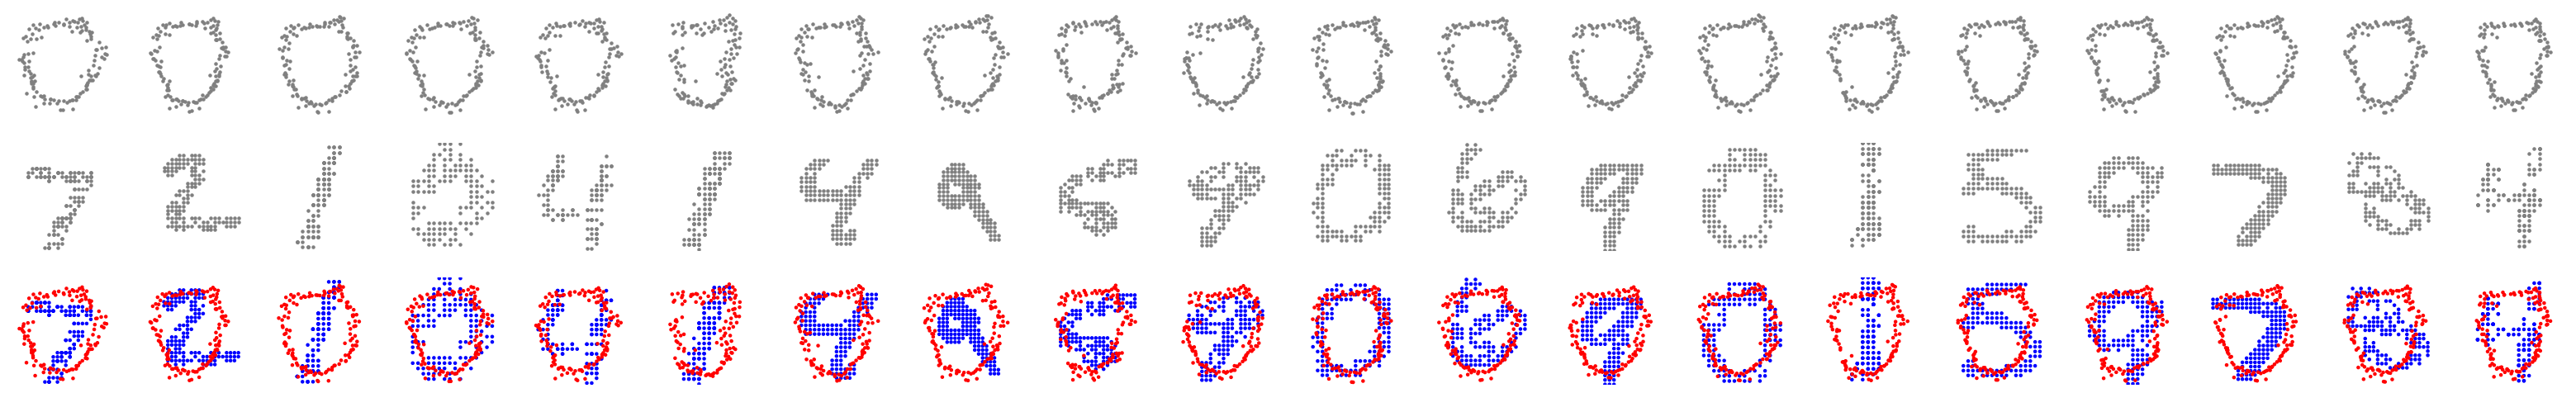

In [5]:
visualize_2d_genmodel("vae_mnist",num_pc=20)

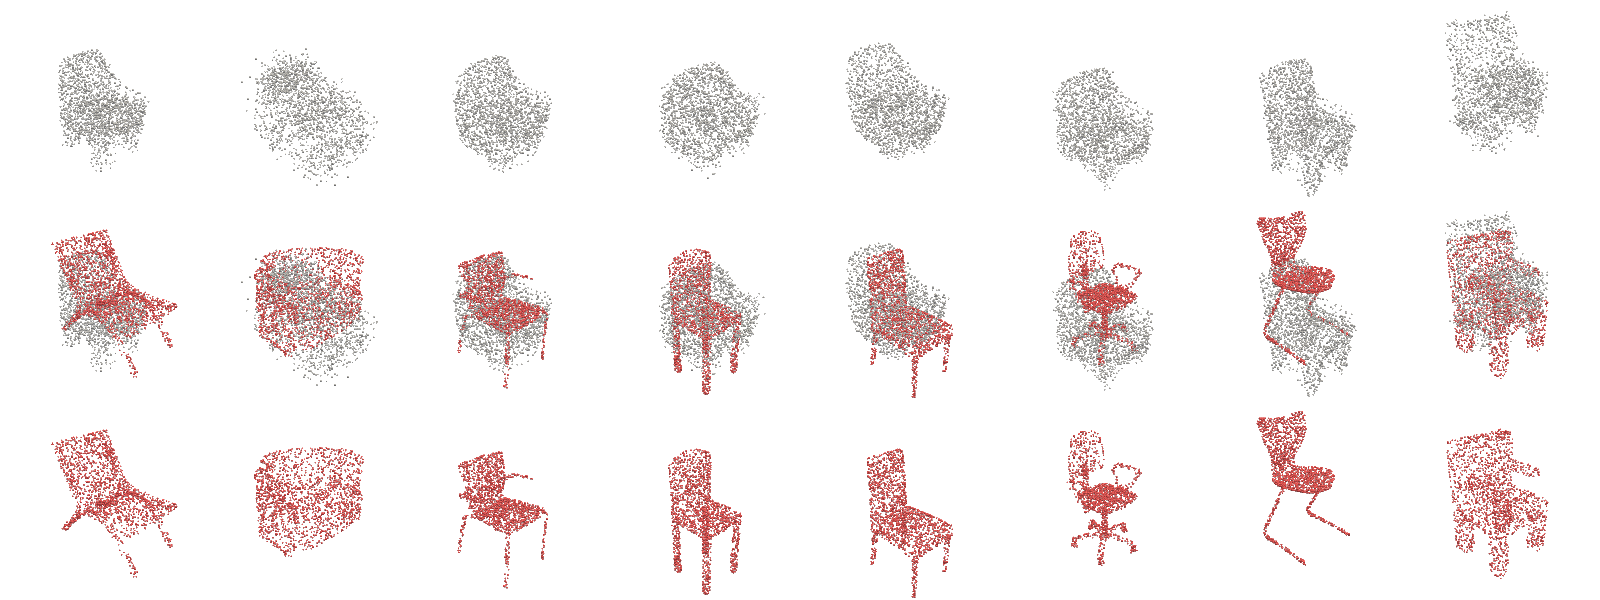

In [6]:
visualize_3d_genmodel("vae_chair",scale=6,num_pc=8)

# Reconstructed Samples.

## MNIST

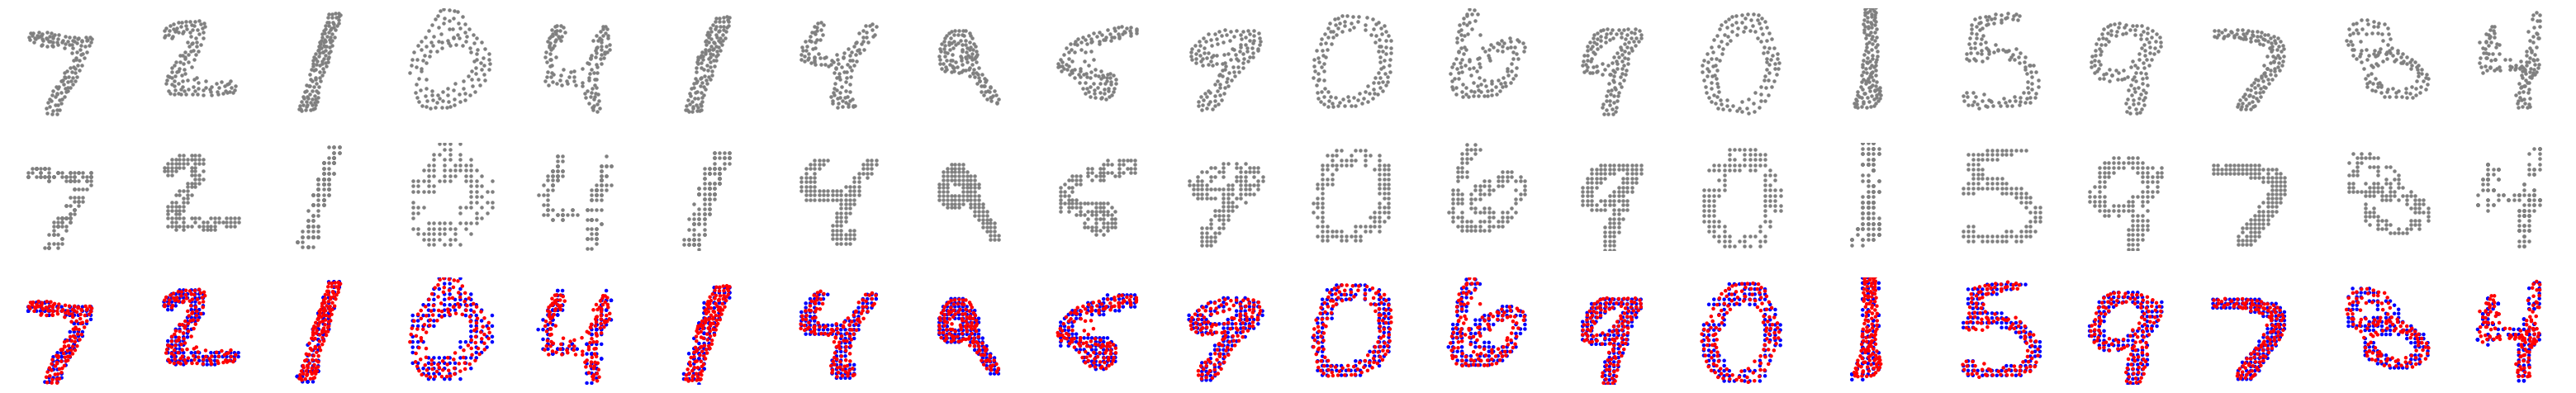

In [7]:
visualize_2d_model("encoder_mnist",num_pc=20)

In [9]:
# visualize_2d_model("vae_mnist",num_pc=20)

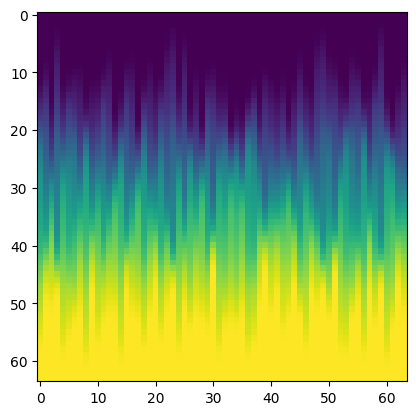

In [ ]:
import matplotlib.pyplot as plt
vae_ect = torch.load("./results/vae_mnist/reconstructed_ect.pt")
vae_ect.shape
plt.imshow(vae_ect[0].squeeze().cpu().numpy())

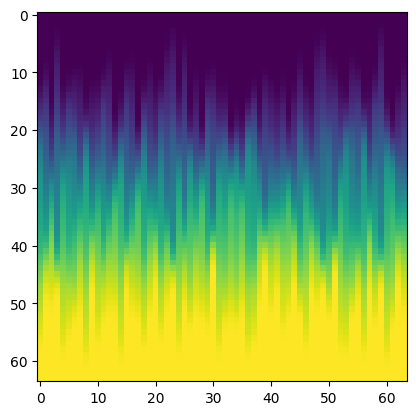

In [ ]:
ect = torch.load("./results/vae_mnist/ect.pt")
ect.shape
plt.imshow(vae_ect[0].squeeze().cpu().numpy())

In [ ]:
torch.norm(vae_ect[1]-ect[1])

tensor(0.1594, device='cuda:0')

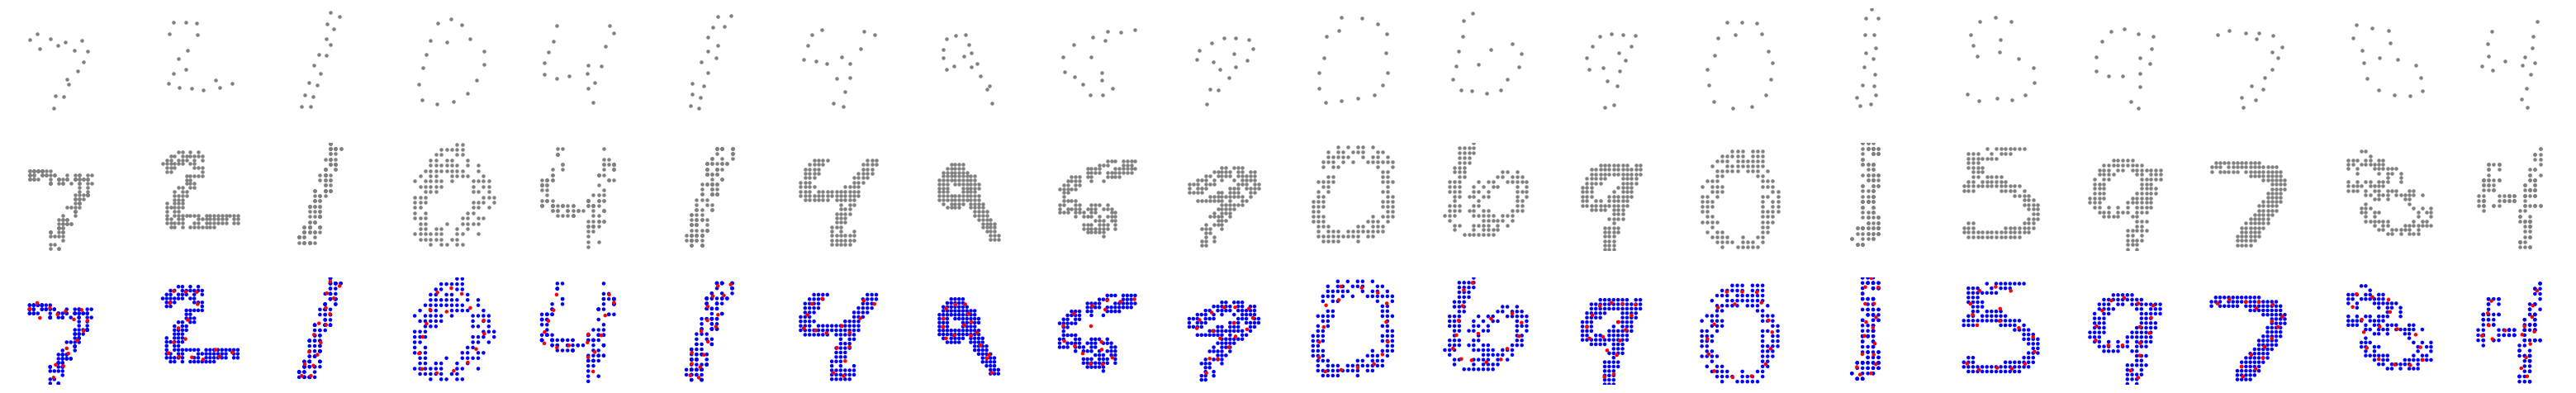

In [ ]:
visualize_2d_model("encoder_downsample_mnist",num_pc=20)

In [11]:
# visualize_2d_model("encoder_mnist_upsample",num_pc=10)

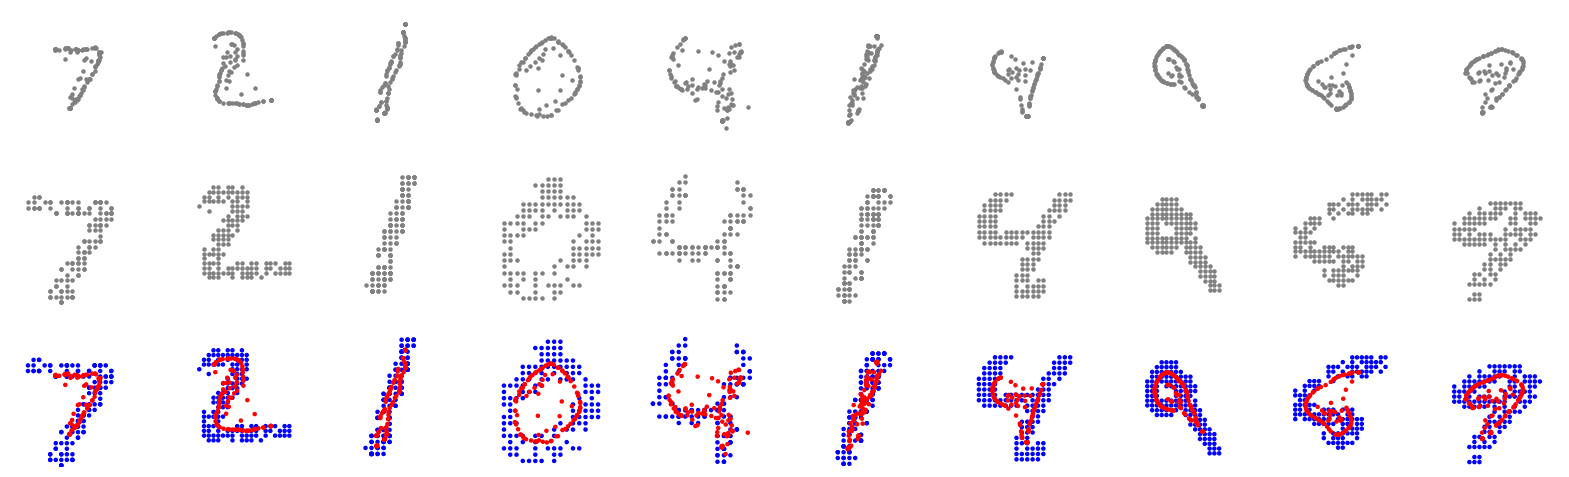

In [ ]:
visualize_2d_rendered("rendered_mnist",128,10)

## CNN Encoder Chair (ECT + Chamfer distance loss)

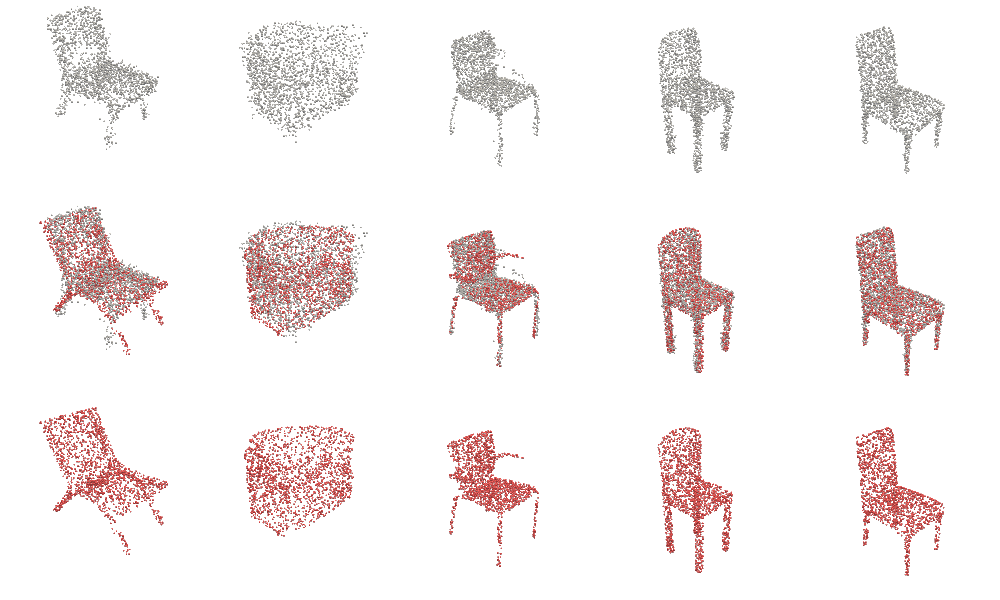

In [ ]:
visualize_3d_model("encoder_chair",scale=6)


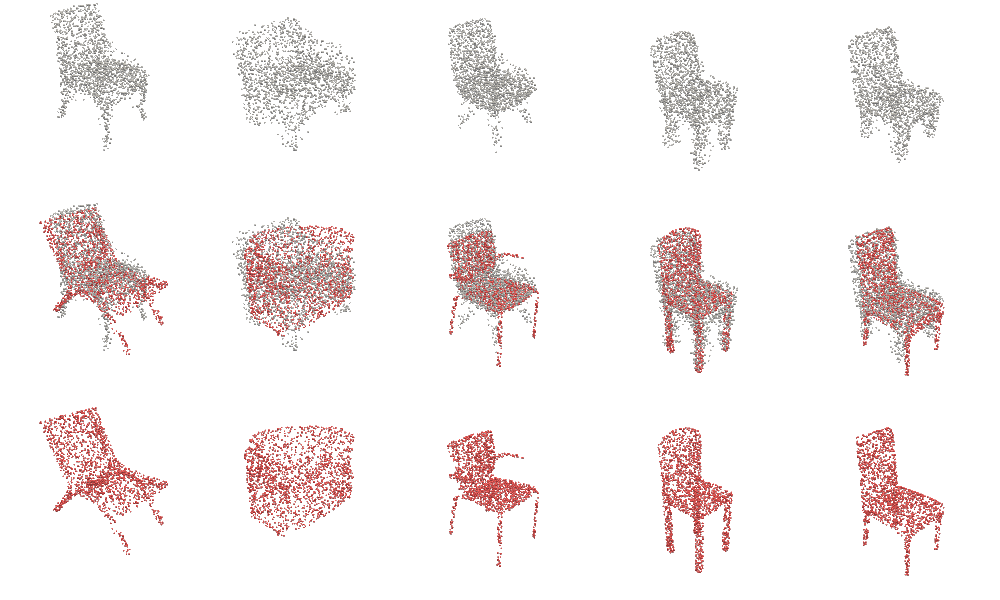

In [ ]:
visualize_3d_model("vae_chair",scale=6)

## CNN Encoder Chair (ECT + Chamfer loss)

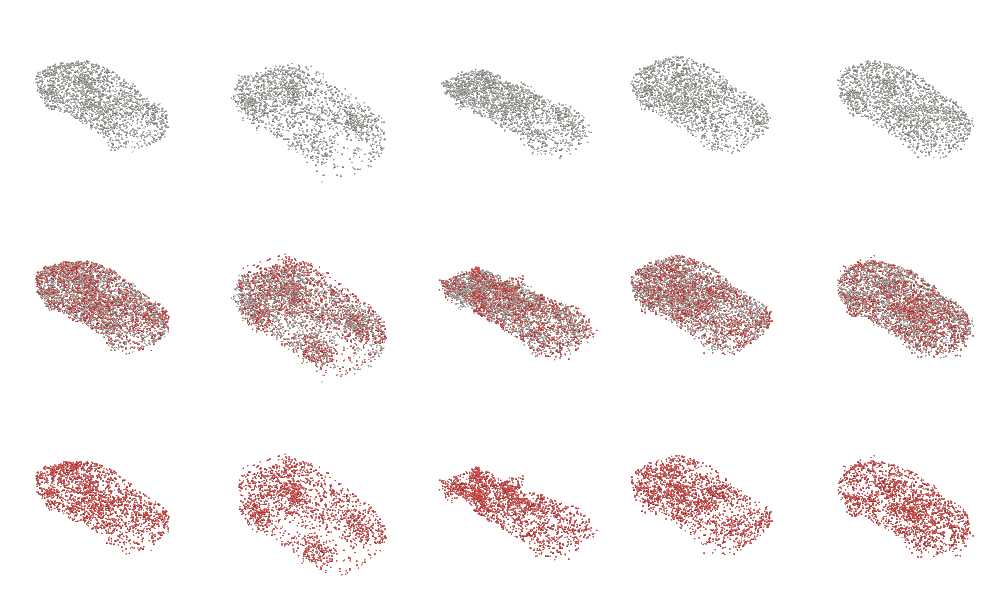

In [ ]:
visualize_3d_model("encoder_car",scale=7)


# Encoder with only ECT loss

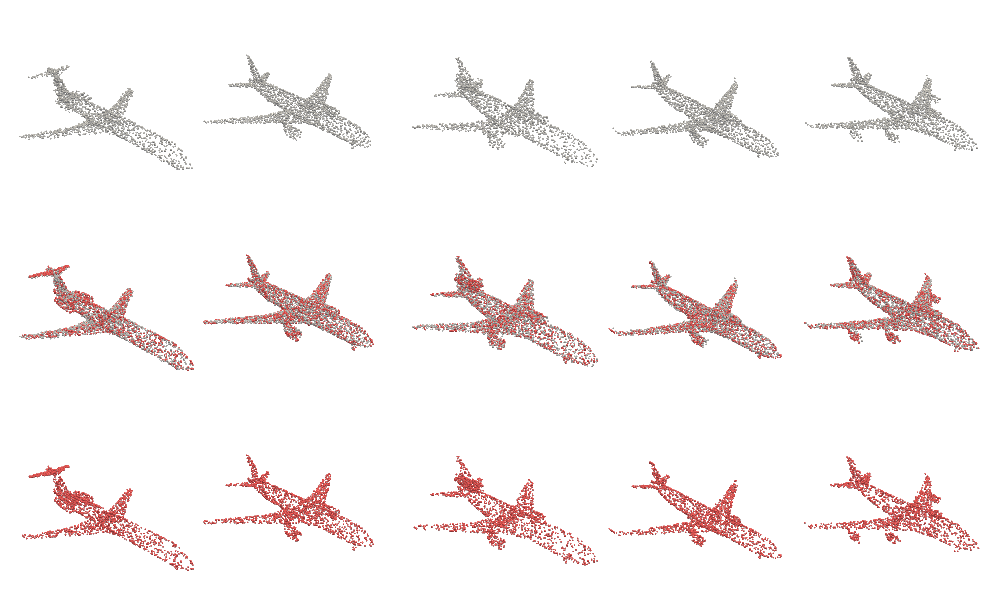

In [ ]:
visualize_3d_model("encoder_airplane",scale=10)

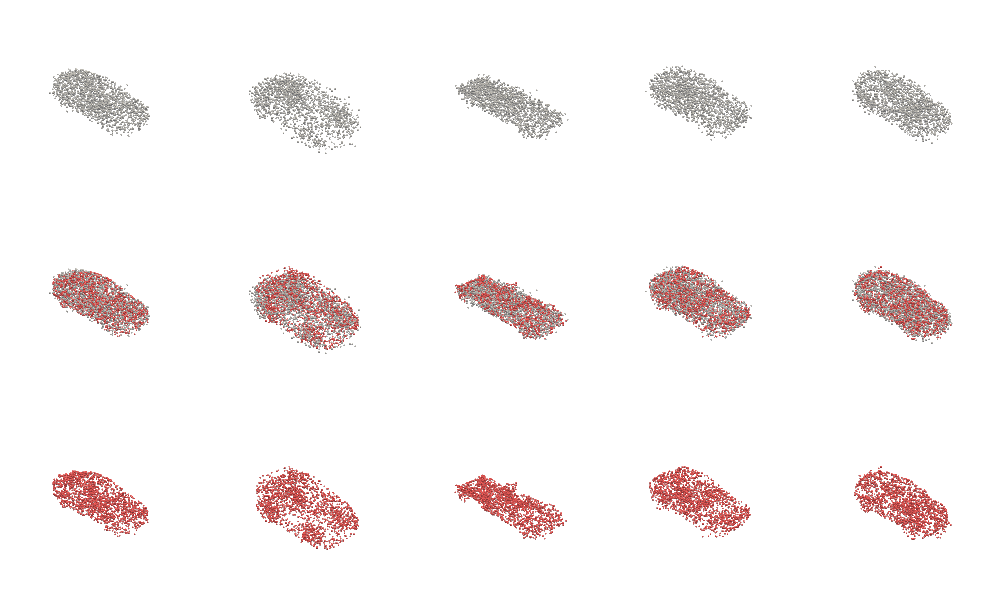

In [ ]:
visualize_3d_model("encoder_ect_car",scale=5)

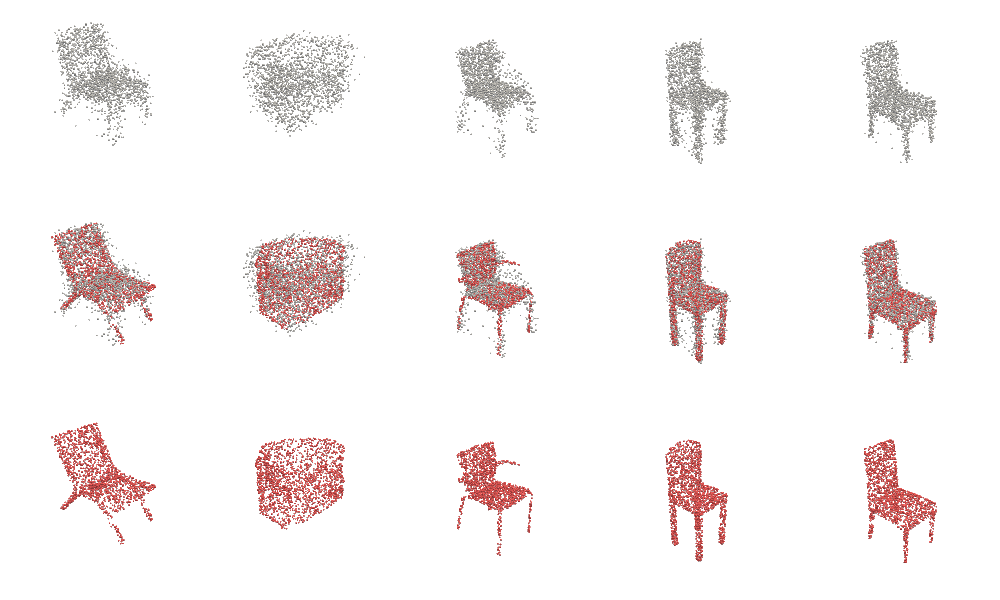

In [ ]:
visualize_3d_model("encoder_ect_chair",scale=5)

## CNN Encoder Airplane

In [19]:
# visualize_3d_model("encoder_airplane",scale=10)


## ECT-64

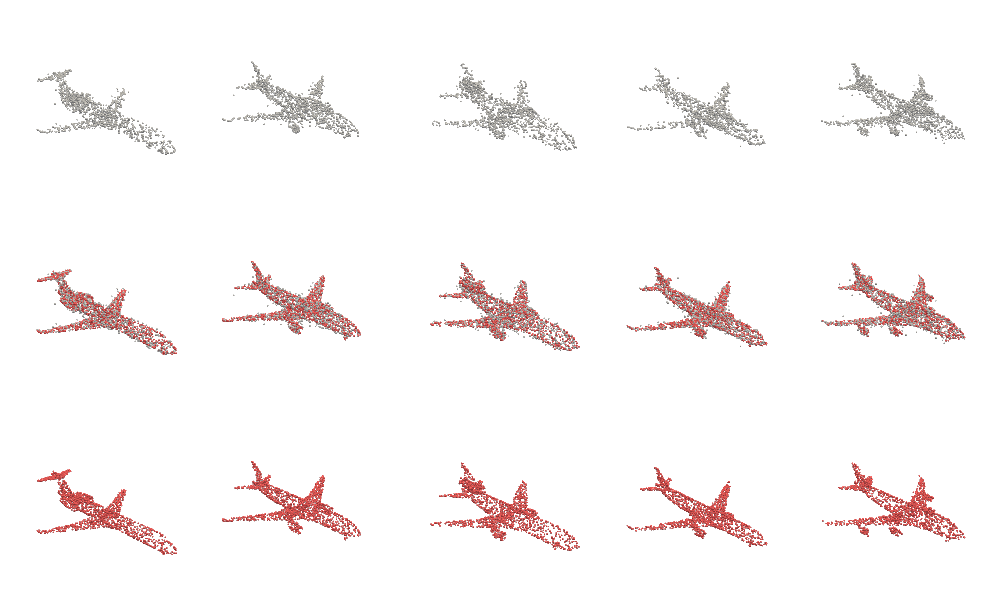

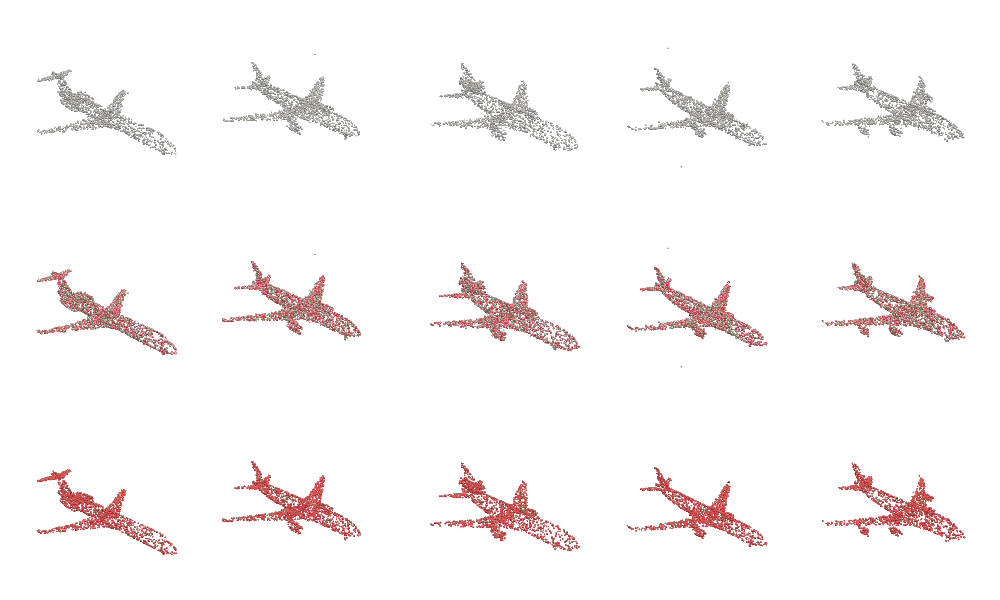

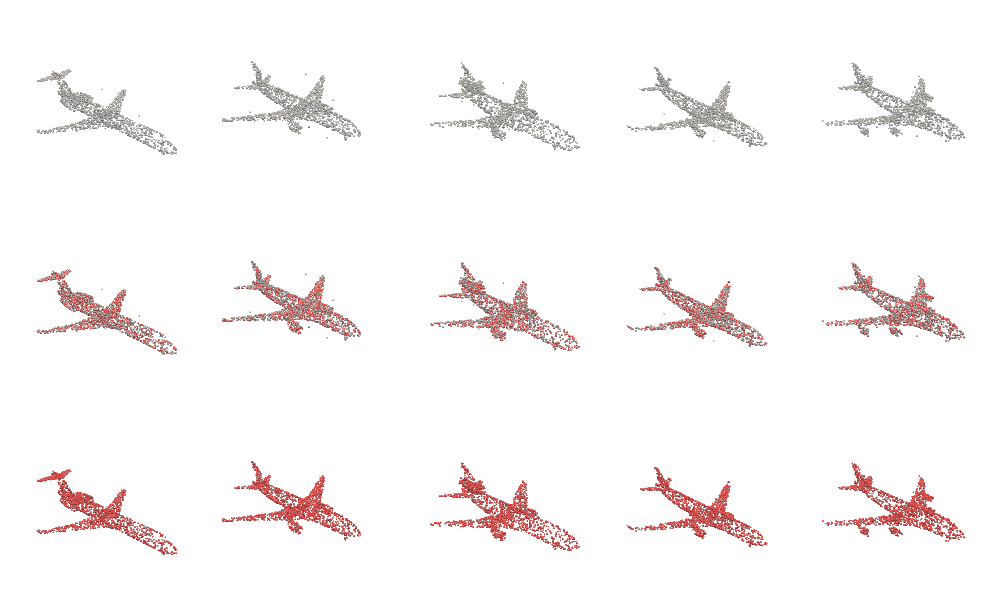

In [ ]:
def plot_rendered(cate,resolution,scale=1):
    recon_pcs = scale*torch.load(f'./results/rendered/reconstructions_{cate}_{resolution}.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'./results/rendered/references_{cate}_{resolution}.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs)

plot_rendered("airplane","64")
plot_rendered("airplane","128")
plot_rendered("airplane","256")

# Downsample Airplane

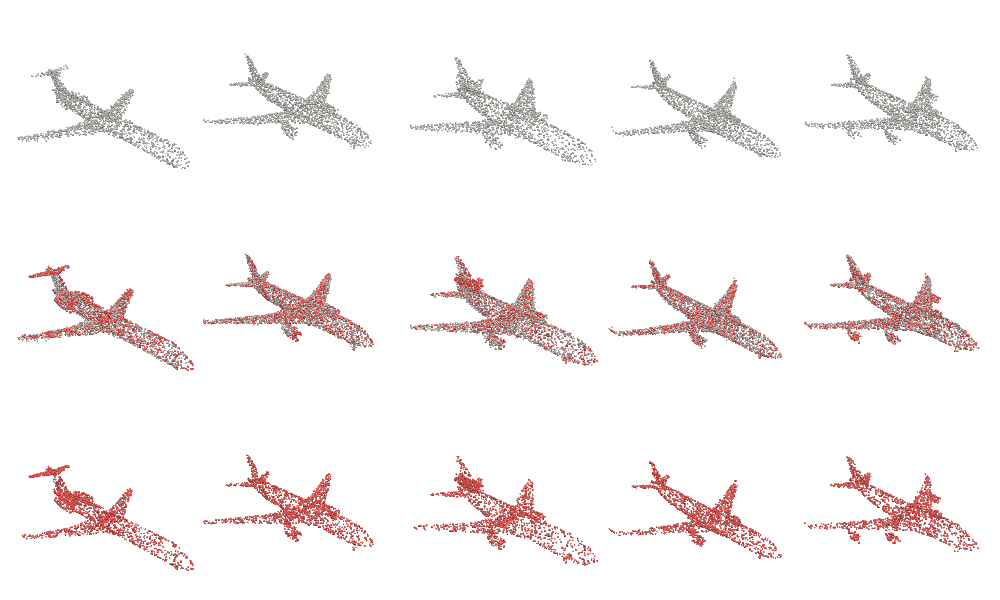

In [ ]:
visualize_3d_model("encoder_downsample_airplane",scale=10)

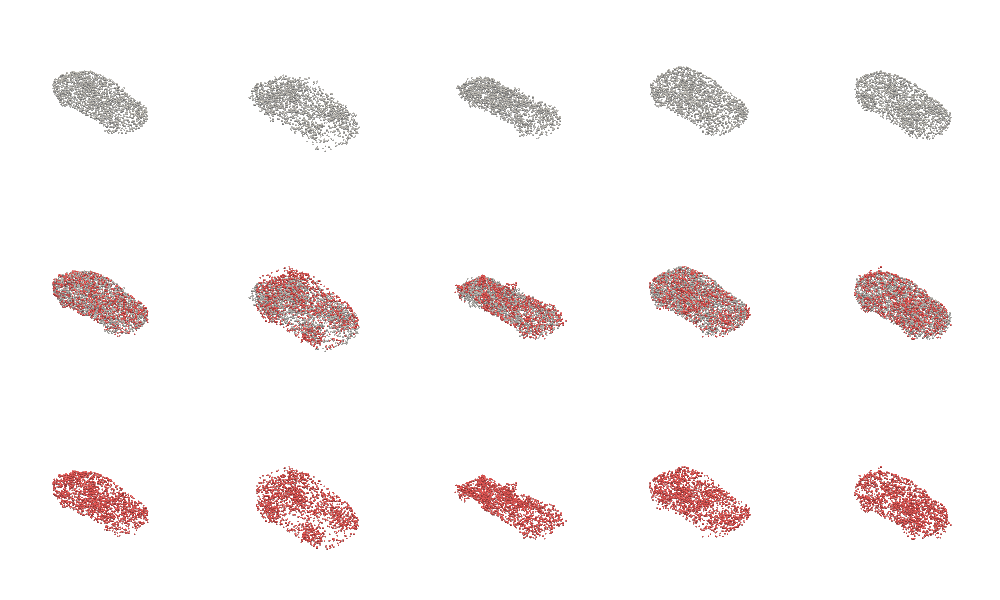

In [ ]:
visualize_3d_model("encoder_downsample_car",scale=5)

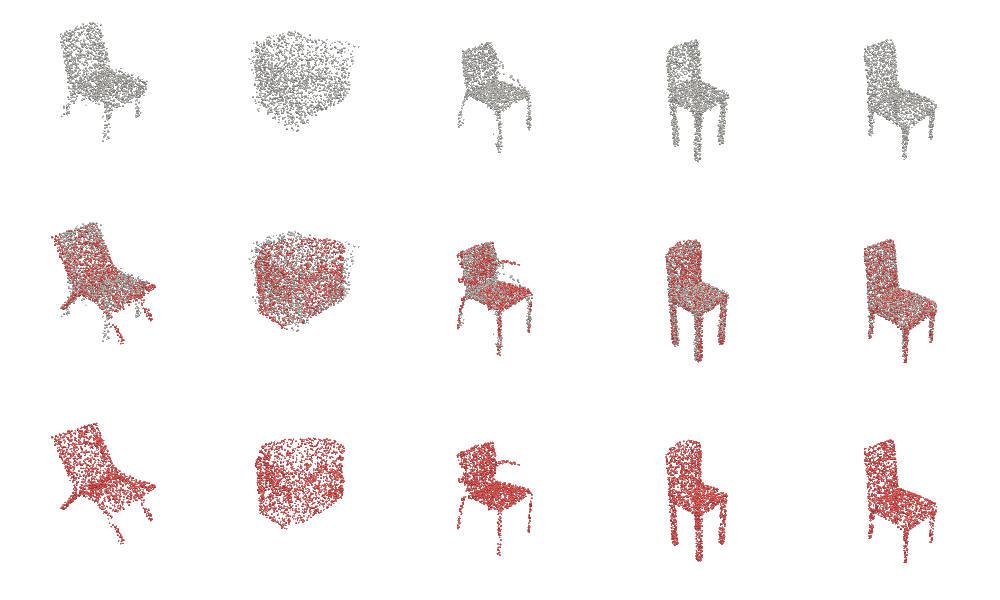

In [ ]:
visualize_3d_model("encoder_downsample_chair",scale=5)